# 0. Import Dependencies

Note: The code in section 0 should be run, while the code in section 1 and section 2 can be skipped

In [82]:
## data manipulation, statistics and visualization
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro, ranksums, ttest_ind
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import scipy.signal as signal

## model development and evaluation
import sklearn as sk
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV, LeaveOneOut, cross_val_score, cross_validate, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA


## EEG analysis, DFA, feature selection
import mne
import fathon
from fathon import fathonUtils as fu
import mrmr
from mrmr import mrmr_classif

## system operations
import os
import glob
import openpyxl

# %matplotlib inline
%matplotlib inline

In [83]:
# set the working paths

# PATH = r'C:\Users\nikol\home\master_thesis\HRI'
# EEG_PATH = os.path.join(PATH,'Data', 'Cleaned EEG signals')


DATA_PATH = os.path.join('Data', 'Feature powers.xlsx')
TARGET_PATH = os.path.join('Data', 'Target data.xlsx')

# 1. Load EEG data

Note: The code in the current section cannot be run, because no raw EEG signals are provided, due to privacy restictions.

The code from section 0 and section 3 onward is sufficient for the development of the models.

In [4]:
# robot_indx = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 28, 29, 32, 37, 46, 47, 49] #[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 28, 29, 32, 37, 46, 47, 49]
# display_indx = [19, 20, 24, 25, 26, 27, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 48] #[19, 20, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 48]


# robot_dict = {}
# display_dict = {}
# files = glob.glob(EEG_PATH + "\*.set")

# for filePath in files:
#     fName = os.path.basename(filePath) #filename
#     _, ext = os.path.splitext(filePath) #extension (.set)
#     p = int(os.path.splitext(fName)[0].split('_')[0]) #split filenames into participant integers
    
#     if p in robot_indx: # add each file with index in participant indeces to robot group
#         robot_dict[p] = mne.io.read_raw_eeglab(filePath, preload=False)
#     elif p in display_indx: # and display group
#         display_dict[p] = mne.io.read_raw_eeglab(filePath, preload=False)

Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\10_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\11_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\12_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\13_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\14_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\15_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\16_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\17_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\18_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\19_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\20_final.fdt
Reading C:\Users\nikol\home\master_thesis\HRI\Data\Cleaned EEG signals\21_fi

In [5]:
# # check participant count per condition
# n_robot = len(robot_dict)
# n_display = len(display_dict)

# print("robot-group dict:", n_robot, 'participant(s)')
# print("display-group dict:", n_display, 'participant(s)')

# # define dictionary to map 10-20 channel names to eeg sensor locations
# channel_dict = {}
# channels = ['E5', 'E10', 'E12', 'E20', 'E24', 'E28', 'E35', 'E39', 'E42', 'E50', 'E52', 'E60', 'E6', 'E18', 'E58', 'E34', 'E37','Cz']
# channel_names = ['Fp2', 'Fp1', 'F3', 'C3', 'T7', 'P3', 'O1', 'O2', 'P4', 'C4', 'T8', 'F4', 'Fz', 'F7', 'F8', 'Pz', 'Oz', 'Cz']

# x = 0
# for ch in channels:
#     channel_dict[ch] = channel_names[x]
#     x+=1

# # change channel names to 10-20 system
# for participant in robot_dict:
#     robot_dict[participant].pick_channels(channels)
#     robot_dict[participant].rename_channels(channel_dict)
    
# for participant in display_dict:
#     display_dict[participant].pick_channels(channels)
#     display_dict[participant].rename_channels(channel_dict)

robot-group dict: 20 participant(s)
display-group dict: 21 participant(s)


In [6]:
# children_indx = list(set(robot_indx + display_indx))

# 2. Extract DFA exponents from EEG

NOTE: In the DFA_each_channel folder, there are already files with DFA exponents per each EEG channel. 


Skip the current section

In [44]:
# #combine the the dictionaries with EEG recordings (the robot group EEG and the display group EEG)
# eeg_dict = {**robot_dict, **display_dict}

In [45]:
# #set frequency and period for extracting EEG data
# sampling_freq = eeg_dict[9].info['sfreq']
# start_stop_seconds = np.array([0, 420])
# start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)

In [46]:
# # print all of the 18 channels
# print(eeg_dict[9].ch_names, end = '')

['Fp2', 'Fz', 'Fp1', 'F3', 'F7', 'C3', 'T7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'P4', 'C4', 'T8', 'F8', 'F4', 'Cz']

In [47]:
# # choose the index of the EEG channel
# # change that index to calculate DFA for each channel
# channel_index = 0

In [48]:
# # create the dictionary that will contain the EEG data for all of the children and the specific channel
# eeg_data = {}


# for child in children_indx:
#       eeg_data[child] = eeg_dict[child][channel_index, start_sample:stop_sample][0]

extract the DFA exponents and save them in text files

In [49]:
# #define the epochs to divide the signal
# winSizes = fu.linRangeByStep(10, 420)
# revSeg = True
# polOrd = 3

In [50]:
# %%time
# np.random.seed(42)
# # create a list with DFA exponents for all of the children and the specific channel

# dfa_list = []

# for child in children_indx:
#     eeg_data[child] = fu.toAggregated(eeg_data[child])
#     pydfa = fathon.DFA(eeg_data[child])
#     n, F = pydfa.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
#     H, H_intercept = pydfa.fitFlucVec()
    
#     dfa_list.append(H)

Wall time: 3min 49s


In [51]:
# # save the DFA exponents in a text file (for each children and for the specific channel)
# with open(f'./Data/{eeg_dict[9].ch_names[channel_index]}_dfa.txt', 'w') as file:
#     for exp in dfa_list:
#         file.write(f'{exp}\n')

# 3. Prepare the spectral and spectral + dfa dataframes

In [84]:
#set the indexes of the subjects

robot_indx = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 28, 29, 32, 37, 46, 47, 49] #[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 28, 29, 32, 37, 46, 47, 49]
display_indx = [19, 20, 24, 25, 26, 27, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 48] #[19, 20, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 48]

children_indx = list(set(robot_indx + display_indx))

### spectral dataframe

In [85]:
df = pd.read_csv(r'C:\Users\nikol\home\master_thesis\HRI\Data\Data for analysis.csv')

In [86]:
df.head()

,Alpha_Fp2,Alpha_Fz,Alpha_Fp1,Alpha_F3,Alpha_F7,Alpha_C3,Alpha_T7,Alpha_P3,Alpha_Pz,Alpha_O1,...,Theta_Pz,Theta_O1,Theta_Oz,Theta_O2,Theta_P4,Theta_C4,Theta_T8,Theta_F8,Theta_F4,Theta_Cz
0,0.028005,0.025543,0.033725,0.021520,0.031198,0.019469,0.020393,0.049094,0.035638,0.076420,...,0.073656,0.143430,0.079914,0.149000,0.063464,0.028193,0.049522,0.042867,0.041428,0.025362
1,0.066787,0.020425,0.058658,0.033809,0.037161,0.019144,0.027368,0.017928,0.033277,0.024825,...,0.099069,0.059135,0.079719,0.024085,0.026778,0.031009,0.043702,0.086246,0.042422,0.107690
2,0.032486,0.008851,0.030163,0.029507,0.019806,0.043389,0.017797,0.022720,0.051034,0.038443,...,0.161600,0.095407,0.090135,0.050079,0.029033,0.031349,0.031688,0.035050,0.034220,0.026061
3,0.020717,0.014687,0.015166,0.019669,0.016095,0.019574,0.019952,0.047569,0.046287,0.045120,...,0.093576,0.118570,0.114930,0.113910,0.071460,0.042365,0.347680,0.045091,0.038763,0.022510
4,0.020260,0.011899,0.010162,0.014366,0.014978,0.009105,0.020226,0.024900,0.022950,0.026199,...,0.055291,0.060399,0.067381,0.050769,0.030912,0.019739,0.026145,0.018662,0.022490,0.024398


In [87]:
#remove the pilot subjects

df = df.drop(list(range(0,8)), axis=0)
df.reset_index(inplace = True)
df.drop(['index'], inplace = True, axis=1)

In [88]:
# rename the dataframe
X_spec = df

In [89]:
# fix the indexes
X_spec.reset_index(inplace = True)
X_spec.drop(['index'], inplace = True, axis=1)

In [90]:
X_spec.head()

,Alpha_Fp2,Alpha_Fz,Alpha_Fp1,Alpha_F3,Alpha_F7,Alpha_C3,Alpha_T7,Alpha_P3,Alpha_Pz,Alpha_O1,...,Theta_Pz,Theta_O1,Theta_Oz,Theta_O2,Theta_P4,Theta_C4,Theta_T8,Theta_F8,Theta_F4,Theta_Cz
0,0.017707,0.021770,0.014258,0.019129,0.014458,0.020431,0.022002,0.029920,0.019599,0.029561,...,0.058258,0.079902,0.122430,0.069646,0.082696,0.030301,0.033751,0.054505,0.043710,0.060896
1,0.049929,0.014687,0.011599,0.029720,0.026043,0.050137,0.032211,0.044511,0.042806,0.054709,...,0.099537,0.098873,0.076274,0.045716,0.030713,0.029602,0.073933,0.044304,0.029057,0.022627
2,0.024215,0.025334,0.032409,0.034089,0.032360,0.025206,0.027160,0.032523,0.066768,0.074313,...,0.133200,0.084059,0.096908,0.072529,0.057626,0.066277,0.037352,0.048213,0.049935,0.132430
3,0.010272,0.005244,0.038857,0.006859,0.009097,0.018431,0.005609,0.012296,0.021355,0.038521,...,0.072831,0.129270,0.069882,0.112520,0.039772,0.024029,0.044573,0.031170,0.043586,0.039038
4,0.038488,0.008678,0.025392,0.014148,0.021428,0.015591,0.011258,0.010438,0.016658,0.018522,...,0.058125,0.065831,0.067317,0.055913,0.027154,0.025175,0.034657,0.078855,0.029020,0.022509


### prepare dfa data

In [91]:
# create a dictionary that will contain the DFA exponents
dfa_data = dict((ch, []) for ch in robot_dict[9].ch_names)

In [92]:
# read each of the DFA text files
for ch in robot_dict[9].ch_names:

    data =  open(f'./Data/DFA_each_channel/{ch}_dfa.txt', 'r')

    dataString = data.read()
    text_dfa = dataString.split('\n')
                 
    dfa_data[ch].append(text_dfa)

    

In [93]:
for ch in robot_dict[9].ch_names:
    dfa_data[ch] = dfa_data[ch][0]

In [94]:
dfa_data = pd.DataFrame(dfa_data)

In [95]:
data.close()

In [96]:
#transform the DFA features into floats
for ch in robot_dict[9].ch_names:
    dfa_data[ch] = dfa_data[ch].astype(float)

##### remove the not-tested subjects

In [97]:
# get the indexes of subjects to remove
remove_list = [9, 18, 45, 46, 48, 42, 43, 44, 47]
remove_index = []


for num in remove_list:
    remove_index.append(children_indx.index(num))

print(remove_index)

[0, 9, 36, 37, 39, 33, 34, 35, 38]


##### remove not-tested subjects from spectral + dfa data

In [98]:
dfa_data.drop(remove_index, axis=0, inplace=True)

In [99]:
# fix the indexes
dfa_data.reset_index(inplace = True)
dfa_data.drop(['index'], inplace = True, axis=1)

###### remove not-tested subjects from spectral data

In [100]:
X_spec.drop(remove_index, axis=0, inplace=True)

In [101]:
# fix the indexes
X_spec.reset_index(inplace = True)
X_spec.drop(['index'], inplace = True, axis=1)

### prepare target data

In [102]:
target_data = pd.read_csv(r'C:\Users\nikol\home\master_thesis\HRI\Data\Target data.csv')

In [103]:
average_score = np.mean(target_data['TOTAL CORRECT'])

def classification_transf(row):
    if row['TOTAL CORRECT'] > average_score:
        return 1
    elif row['TOTAL CORRECT'] < average_score:
        return 0

target_data['Successfull'] = target_data.apply(classification_transf, axis=1)

y = target_data['Successfull']

In [104]:
pd.DataFrame(y).value_counts()

Successfull
0              18
1              14
dtype: int64

In [105]:
print(f'Percentage of the children in class "1": {(14/32) * 100}%') 
print(f'Percentage of the children in class "0": {(18/32) * 100 }%') 

Percentage of the children in class "1": 43.75%
Percentage of the children in class "0": 56.25%


In [106]:
y = y.values.reshape(-1,1)

# 4. EDA

In [107]:
spec_viz = df.join(pd.Series(np.squeeze(y)).rename('Success'))
dfa_viz = dfa_data.join(pd.Series(np.squeeze(y)).rename('Success'))

Text(0.5, 1.0, 'Good learners')

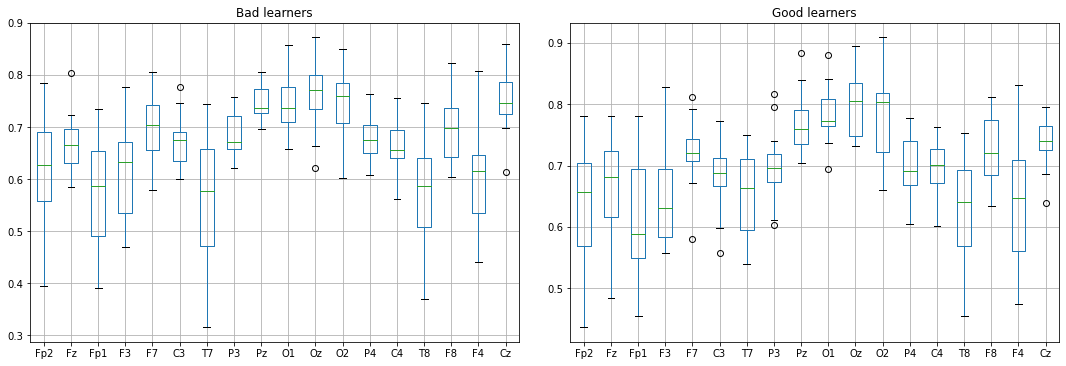

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.tight_layout(pad=1, w_pad=2, h_pad=1.0)


dfa_viz[dfa_viz['Success']== 0].iloc[:,:-1].boxplot(ax=axs.ravel()[0])
dfa_viz[dfa_viz['Success']== 1].iloc[:,:-1].boxplot(ax=axs.ravel()[1])

axs.ravel()[0].set_title('Bad learners')
axs.ravel()[1].set_title('Good learners')

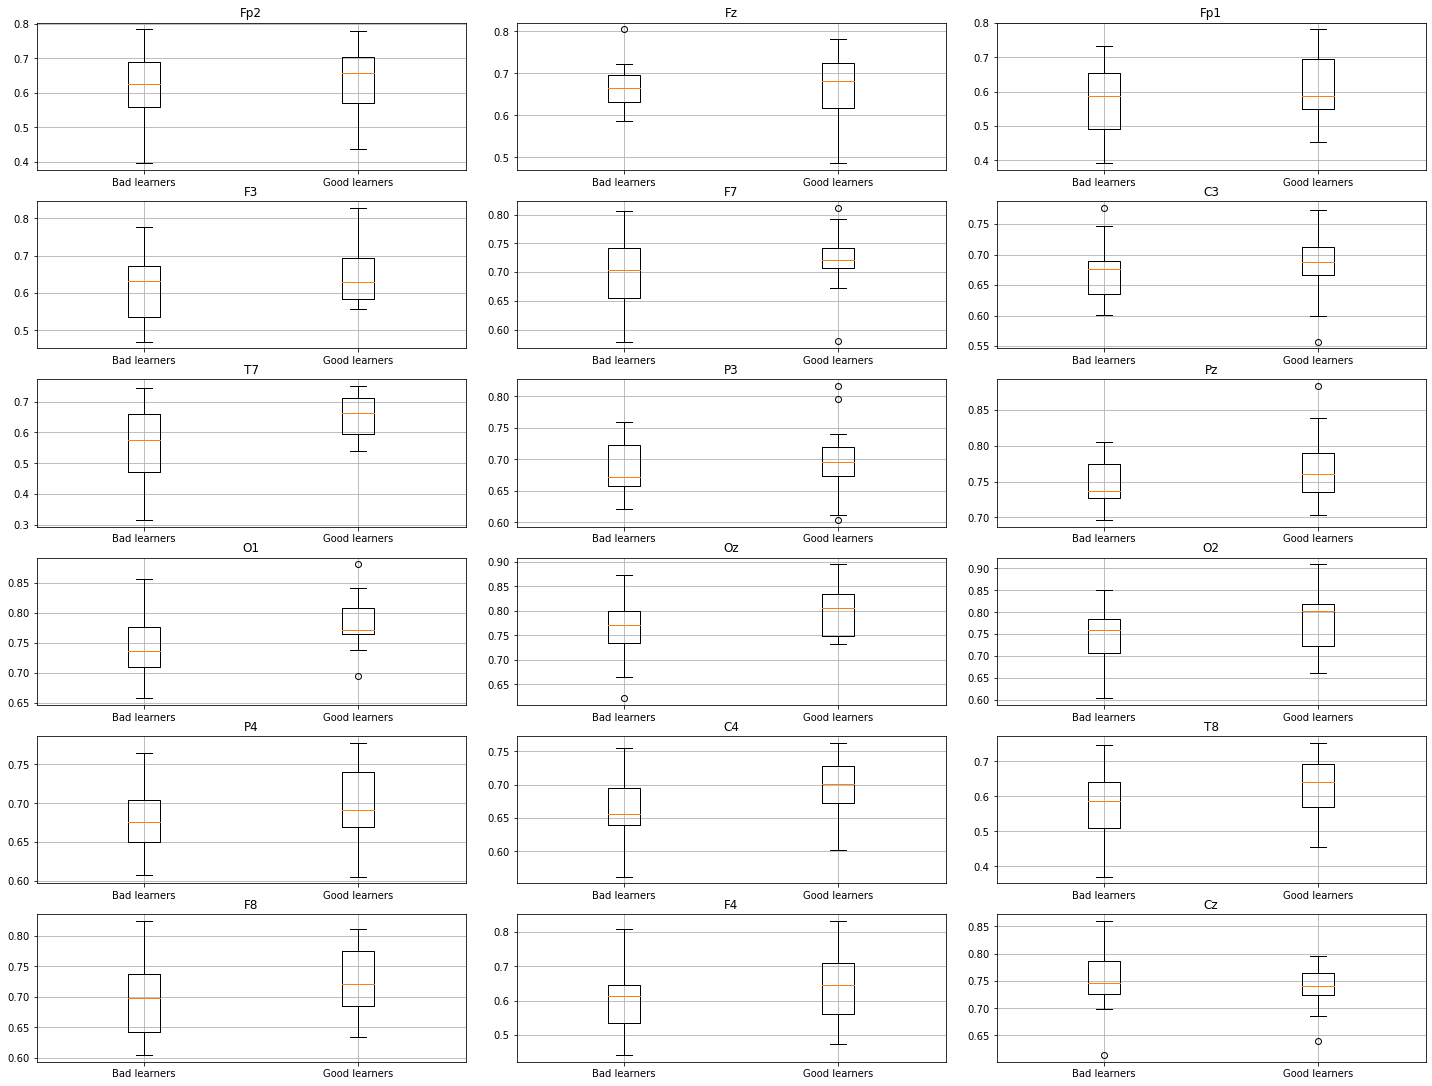

In [109]:

np.random.seed(42)
fig, axs = plt.subplots(6, 3, figsize=(20,15))
fig.tight_layout(pad=1, w_pad=2, h_pad=1.0)
dfa_ch = robot_dict[9].ch_names

for ch, ax in zip(dfa_ch, axs.ravel()):
    ax.boxplot([dfa_viz[dfa_viz['Success']== 0].iloc[:,:-1][f'{ch}'],dfa_viz[dfa_viz['Success']== 1].iloc[:,:-1][f'{ch}']])
    ax.set_xticklabels(['Bad learners', 'Good learners'])
    ax.set_title(f'{ch}')
    ax.grid(visible=True)

# 5. Feature Selection

#### minimum Redundancy - Maximum Relevance

spectral data

In [110]:
selected_features_spec = mrmr_classif(X=X_spec, y=y, K=5)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.15it/s]


In [111]:
selected_features_spec

['Alpha_T7', 'Beta_Cz', 'Beta_Fz', 'Beta_O1', 'Theta_T7']

In [112]:
X_spec = X_spec[selected_features_spec]

In [113]:
X_spec.shape

(32, 5)

dfa data

In [114]:
selected_features_dfa = mrmr_classif(X=dfa_data, y=y, K=3)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 25.00it/s]


In [115]:
selected_features_dfa

['T7', 'O1', 'C4']

In [116]:
dfa_data = dfa_data[selected_features_dfa]

In [117]:
dfa_data.shape

(32, 3)

# 7. Develop the models

In [118]:
param_grid_svc = { 'C':[10.0, 100.0,1000.0, 10000.0, 100000.0],
              'kernel':['rbf','poly'],
              'degree':[1,2,3,4],
              'gamma': [10.0, 100.0,300]}


leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

param_grid_knn = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)


## spectral data

#### SVM

In [119]:
random.seed(42)
svc_spec = GridSearchCV(SVC(random_state=42),
                                 param_grid_svc,
                                 cv=LeaveOneOut(), 
                                 n_jobs=-1)
svc_spec.fit(X_spec, y)

GridSearchCV(cv=LeaveOneOut(), estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [10.0, 100.0, 1000.0, 10000.0, 100000.0],
                         'degree': [1, 2, 3, 4], 'gamma': [10.0, 100.0, 300],
                         'kernel': ['rbf', 'poly']})

In [120]:
svc_spec.best_params_

{'C': 100.0, 'degree': 1, 'gamma': 300, 'kernel': 'rbf'}

#### KNN

In [121]:
knn_spec = GridSearchCV(KNeighborsClassifier(),
                                 param_grid_knn,
                                 cv=LeaveOneOut(), 
                                 n_jobs=-1)
knn_spec.fit(X_spec, y)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [122]:
knn_spec.best_params_

{'leaf_size': 1, 'n_neighbors': 9, 'p': 2}

## spectral + DFA

In [123]:
X_dfa = df.join(dfa_data)

#### SVM

In [124]:
svc_dfa = GridSearchCV(SVC(random_state=42),
                                 param_grid_svc,
                                 cv=LeaveOneOut(), 
                                 n_jobs=-1)
svc_dfa.fit(X_dfa, y)

GridSearchCV(cv=LeaveOneOut(), estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [10.0, 100.0, 1000.0, 10000.0, 100000.0],
                         'degree': [1, 2, 3, 4], 'gamma': [10.0, 100.0, 300],
                         'kernel': ['rbf', 'poly']})

In [125]:
svc_dfa.best_params_

{'C': 10.0, 'degree': 1, 'gamma': 10.0, 'kernel': 'poly'}

#### KNN

In [126]:
knn_dfa = GridSearchCV(KNeighborsClassifier(),
                                 param_grid_knn,
                                 cv=LeaveOneOut(), 
                                 n_jobs=-1)
knn_dfa.fit(X_dfa, y)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [127]:
knn_dfa.best_params_

{'leaf_size': 1, 'n_neighbors': 4, 'p': 1}

# 8. Evaluate the models

In [128]:
# define a function that compares the LOO perfromance of a set of predetrmined models 
def cv_comparison(models, X, y):
    # Initiate a DataFrame for the averages and a list for all measures
    loo = LeaveOneOut()
    cv_metrics = pd.DataFrame()
    y_true = []
    y_pred = []
    random.seed(42)
    name = ['Spectral Features Model', 'KNN', 'Zero']

    for model in models:
    
        for i, j in loo.split(X):
            X_train, X_test = X.iloc[i,:], X.iloc[j, :]
            y_train, y_test = y[i], y[j]
            model.fit(X_train, y_train)
            y_hat = model.predict(X_test)
            y_true.append(y_test[0])
            y_pred.append(y_hat[0])

            accuracy = accuracy_score(y_true, y_pred)
            recall = recall_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred)
            f1 = f1_score(y_true, y_pred)

            cv_metrics[model] = [accuracy,f1,recall, precision]

    cv_metrics.index = ['Accuracy','F1-score','Recall', 'Precision']
    return cv_metrics, recall, precision, f1, accuracy

## spectral

In [129]:
print(f'SVM hyperparameters: {svc_spec.best_params_}')
print(f'KNN hyperparameters: {knn_spec.best_params_}')

SVM hyperparameters: {'C': 100.0, 'degree': 1, 'gamma': 300, 'kernel': 'rbf'}
KNN hyperparameters: {'leaf_size': 1, 'n_neighbors': 9, 'p': 2}


In [130]:
svm_spec_model = SVC(C=100,
                    degree=1,
                    gamma=300,
                    kernel='rbf', random_state=42)

knn_spec_model = KNeighborsClassifier(leaf_size=1,
                                     n_neighbors = 9,
                                     p=2)

zeroR_spec = DummyClassifier(strategy='most_frequent')

models = [svm_spec_model, knn_spec_model, zeroR_spec]

In [131]:
comp_spec, recall, precision, f1, accuracy = cv_comparison(models, X_spec, y)

In [132]:
comp_spec

,"SVC(C=100, degree=1, gamma=300, random_state=42)","KNeighborsClassifier(leaf_size=1, n_neighbors=9)",DummyClassifier(strategy='most_frequent')
Accuracy,0.843750,0.765625,0.697917
F1-score,0.800000,0.736842,0.591549
Recall,0.714286,0.750000,0.500000
Precision,0.909091,0.724138,0.724138


### DFA + Spectral

In [133]:
print(f'SVM hyperparameters: {svc_dfa.best_params_}')
print(f'KNN hyperparameters: {knn_dfa.best_params_}')

SVM hyperparameters: {'C': 10.0, 'degree': 1, 'gamma': 10.0, 'kernel': 'poly'}
KNN hyperparameters: {'leaf_size': 1, 'n_neighbors': 4, 'p': 1}


In [134]:
svm_dfa_model = SVC(C=10,
                    degree=1,
                    gamma=10,
                    kernel='poly')

knn_dfa_model = KNeighborsClassifier(leaf_size=1,
                                     n_neighbors = 7,
                                     p=2)

zeroR_dfa = DummyClassifier(strategy='most_frequent')

models = [svm_dfa_model, knn_dfa_model, zeroR_dfa]

In [135]:
comp_dfa, recall, precision, f1, accuracy = cv_comparison(models, X_dfa, y)

In [136]:
comp_dfa

,"SVC(C=10, degree=1, gamma=10, kernel='poly')","KNeighborsClassifier(leaf_size=1, n_neighbors=7)",DummyClassifier(strategy='most_frequent')
Accuracy,0.812500,0.718750,0.666667
F1-score,0.769231,0.689655,0.555556
Recall,0.714286,0.714286,0.476190
Precision,0.833333,0.666667,0.666667


## 9. Prepare the reporting table and graph

In [67]:
table_res = pd.DataFrame({'Spectral features model (SVM algorithm)': [0.843750,0.800000, 0.714286, 0.909091], 
              'Spectral + DFA features model (SVM algorithm)': [0.812500,  0.769231, 0.714286,0.833333], 
              'Spectral features model (KNN algorithm)': [0.765625,  0.736842, 0.750000,0.724138],
              'Spectral + DFA features model (KNN algorithm)': [0.718750,  0.689655, 0.714286,0.666667] }, index=['Accuracy', 'F1-score', 'Recall', 'Precision'])

In [68]:
table_res

,Spectral features model (SVM algorithm),Spectral + DFA features model (SVM algorithm),Spectral features model (KNN algorithm),Spectral + DFA features model (KNN algorithm)
Accuracy,0.843750,0.812500,0.765625,0.718750
F1-score,0.800000,0.769231,0.736842,0.689655
Recall,0.714286,0.714286,0.750000,0.714286
Precision,0.909091,0.833333,0.724138,0.666667


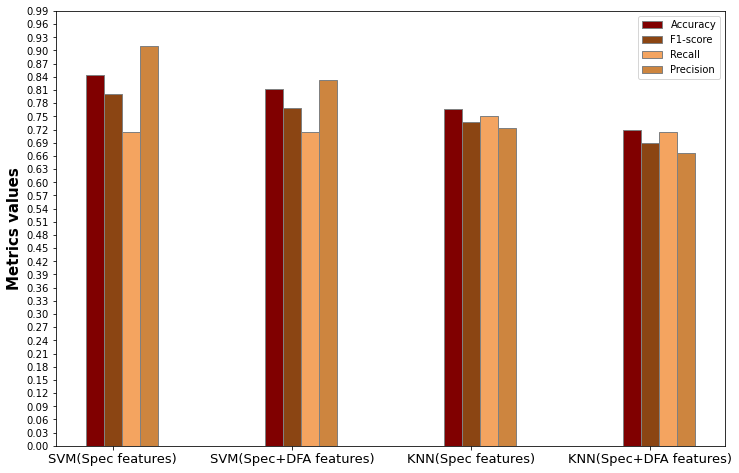

In [70]:
# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Accuracy = [table_res.iloc[0][0], table_res.iloc[0][1], 
            table_res.iloc[0][2],table_res.iloc[0][3] ]
F1_score = [table_res.iloc[1][0], table_res.iloc[1][1],
            table_res.iloc[1][2], table_res.iloc[1][3] ]
Recall = [table_res.iloc[2][0], table_res.iloc[2][1], 
          table_res.iloc[2][2], table_res.iloc[2][3]]
Precision = [table_res.iloc[3][0], table_res.iloc[3][1], 
          table_res.iloc[3][2], table_res.iloc[3][3]]
 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, Accuracy, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, F1_score, color ='saddlebrown', width = barWidth,
        edgecolor ='grey', label ='F1-score')
plt.bar(br3, Recall, color ='sandybrown', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br4, Precision, color ='peru', width = barWidth,
        edgecolor ='grey', label ='Precision')
 
# Adding Xticks
# plt.xlabel('Models', fontweight ='bold', fontsize = 15)

plt.ylabel('Metrics values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        ['SVM(Spec features)', 'SVM(Spec+DFA features)',
         'KNN(Spec features)', 'KNN(Spec+DFA features)'], fontsize= 13)
plt.yticks(list(np.arange(0, 1, 0.03)))

 
plt.legend()
# plt.savefig(r'C:\Users\nikol\home\master_thesis\results.png')
plt.show()
